# Aria Project
**Title:**
"Plant Nutrition Predicton (Prediksi Nutrisi Tanaman)"

Aria, sebuah perusahan agritech sedang membuat project untuk memprediksi informasi nutri pangujian tanaman di 2 laboratorium. Tim researcher menguji 160 tanaman dan menganalisis 8 variabel yang dipakai dalam memperoleh informasi mengenai prediksi nutrisi tanaman. Dengan informasi nutrisi tanaman tersebut, diharapkan mampu mengoptimalkan produksi dan menghindari/meminimalisir kerugian.

**Introduction:**
St. Syakirah, sorang scientist dengan background geofisika dan lulusan Data Scientist di Hacktiv8. Memiliki work experience sebanyak 2 kali di BMKG (Badan Meteorologi, Klimatologi, dan Geofisika) untuk melakukan penelitian science. 

Profile Link
https://www.linkedin.com/in/st-syakirah/ (LinkedIn)
https://github.com/stsyaakirah

**External Link**
Presentation Link : https://docs.google.com/presentation/d/1i1zt8n4lVi0k4QspoOkRx7TD7o_T_flRlOY3AJukHos/edit#slide=id.g1f3655a9b1d_0_125


**Working Area**
Palu, Sulawesi Tengah, Indonesia

## Import Libraries & Data

In [75]:
#Import libraries yang dibutuhkan 
import pandas as pd
import numpy as np
#Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 
sns.set_style('darkgrid')

#Splitting train-test-set
from sklearn.model_selection import train_test_split
#Preprocessing scalling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#Model
#Support Vector Machine
from sklearn.svm import SVR
#Random Forest
from sklearn.ensemble import RandomForestRegressor
#XGBoost
from xgboost import XGBRegressor # Extreme Gradient Boosting 

#Pipline for scalling
from sklearn.pipeline import Pipeline
##Column Transformer
from sklearn.compose import ColumnTransformer
#Grid Search
from sklearn.model_selection import GridSearchCV
#Cross validation score
from sklearn.model_selection import cross_val_score

#Evaluasi Metrics
from sklearn.metrics import r2_score


#Model Inference
import joblib
import json

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Import Data

Pada step ini, dilakukan import data, kemudian membaca dan memahami struktur data.

In [2]:
#Import Data
df = pd.read_excel('F:/Hacktiv8/Project/Aria/aria_data.xlsx')
#Tampilkan 5 Data Pertama
df.head()

,target,v1,v2,v3,v4,v5,v6,v7,v8,sample_type
0,4.63,260.600000,199.000000,391.333333,371.733333,466.800000,273.133333,742.066667,4047.733333,lab 1
1,5.00,263.200000,194.600000,393.666667,348.533333,401.800000,220.066667,712.000000,4673.466667,lab 1
2,4.91,247.266667,205.800000,375.466667,354.866667,419.000000,222.133333,677.200000,4386.800000,lab 1
3,4.77,257.944444,191.833333,368.722222,334.666667,417.222222,195.944444,678.555556,4588.777778,lab 1
4,4.89,258.200000,195.733333,356.666667,333.333333,394.600000,196.000000,677.133333,4867.066667,lab 1


In [3]:
#Tampilkan 5 Data Terakhir
df.tail()

,target,v1,v2,v3,v4,v5,v6,v7,v8,sample_type
155,4.83,573.2500,361.250000,643.125000,489.812500,666.875,355.250000,712.312500,3943.687500,lab 2
156,4.47,678.3750,398.125000,678.250000,541.125000,704.000,393.500000,788.812500,3928.187500,lab 2
157,4.63,634.0000,382.866667,657.466667,505.066667,719.200,366.600000,792.133333,3861.200000,lab 2
158,4.35,615.3125,366.750000,642.937500,483.687500,675.625,359.062500,730.125000,3859.062500,lab 2
159,4.43,575.2000,350.266667,648.333333,495.400000,679.800,346.266667,718.733333,3903.333333,lab 2


In [4]:
#Tampilkan Informasi Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   target       160 non-null    float64
 1   v1           160 non-null    float64
 2   v2           160 non-null    float64
 3   v3           160 non-null    float64
 4   v4           160 non-null    float64
 5   v5           160 non-null    float64
 6   v6           160 non-null    float64
 7   v7           160 non-null    float64
 8   v8           160 non-null    float64
 9   sample_type  160 non-null    object 
dtypes: float64(9), object(1)
memory usage: 12.6+ KB


Dataset terdiri dari 160 jumlah baris dan 10 fiture , 9 fiture merupakan data numerik dan 1 firure bagian dari data kategorikal. Berikut adalah deskripsi dari setiap fiture:

- sample_type : informasi tentang 2 sampel laboratorium yang berbeda

- v1-v2 : informasi tentang variabel-variabel untuk memprediksi nutrisi tanaman

- target : informasi tentang prediksi nutrisi tanaman

In [5]:
# melihat sebaran statistik secara umum
df.describe()

,target,v1,v2,v3,v4,v5,v6,v7,v8
count,160.00000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,4.73375,389.892437,237.442677,480.573041,394.109622,487.316520,251.450820,714.737926,4456.913233
std,0.21405,148.673511,70.128690,118.798984,63.060442,100.941711,59.634652,51.148098,335.035933
min,4.13000,227.285714,178.800000,348.933333,313.733333,373.333333,189.200000,586.266667,3725.666667
25%,4.60000,268.608333,194.029018,384.419643,353.181250,418.583333,213.000000,678.385417,4273.437500
50%,4.72000,295.162500,204.187500,414.383929,370.741667,456.031250,226.062500,718.833333,4554.766667
75%,4.89000,536.409375,244.716667,591.611404,424.131250,496.475000,262.531250,751.446875,4700.612500
max,5.26000,678.375000,422.812500,722.312500,558.500000,721.000000,415.375000,853.466667,5086.375000


Berdasarkan data statistik: 
- Fiture target dan v7 memili nilai mean yang hapir sama dengan nilai median, sehingga datanya terdistribusi normal.
- Nilai Mean > Median ditunjukkan pada fiture v1, v2, v3, v4, v5,v6 yang artinya data terdistribusi miring ke arah kanan (skewed positif)
- Fiture v8 memiliki Mean < Median yang mengindikasikan data terdistribusi miring ke arah kiri (skewed negatif)

*Visualisasi distribusi data akan ditunjukkan pada bagian exploratory data analysis*

## Data Cleaning

Sebelum melakukan explorasi dan preprocessing terhadap data, lakukan pengecekan terhadap anomali data dengan mengecek keberadaan data duplikat, missing values, outlier. Hal ini dilakukan agar kualitas data dapat lebih meningkat dan mendapatkan akurasi analisis yang baik.

In [6]:
#Cek data duplikat
df.loc[df.duplicated()]

,target,v1,v2,v3,v4,v5,v6,v7,v8,sample_type


Setelah melakukan pengecakan, tidak ditemukan adanya data duplikat.

In [7]:
# mengecek jumlah missing value tiap kolom
df.isnull().sum()

target         0
v1             0
v2             0
v3             0
v4             0
v5             0
v6             0
v7             0
v8             0
sample_type    0
dtype: int64

Untuk menghindari kemungkinan terjadinya nilai yang hilang (missing value) yang tidak terduga, disarankan untuk melakukan pengecekan missing value menggunakan try-except statement agar lebih meyakinkan.

In [8]:
#Try-except-statement
cnt=0
for row in df:
    try:
        int(row)
        df.loc[cnt]=np.nan
    except ValueError:
        pass
    cnt+=1

In [9]:
#Pengecekan kembali missing values
df.isnull().sum()

target         0
v1             0
v2             0
v3             0
v4             0
v5             0
v6             0
v7             0
v8             0
sample_type    0
dtype: int64

Setelah melakukan try-except-statement dan mengecek kembali missing values, tidak ditemukan adanya missing values. Langkah selanjutnya melihat persebaran outlier mengggunakan boxplot.

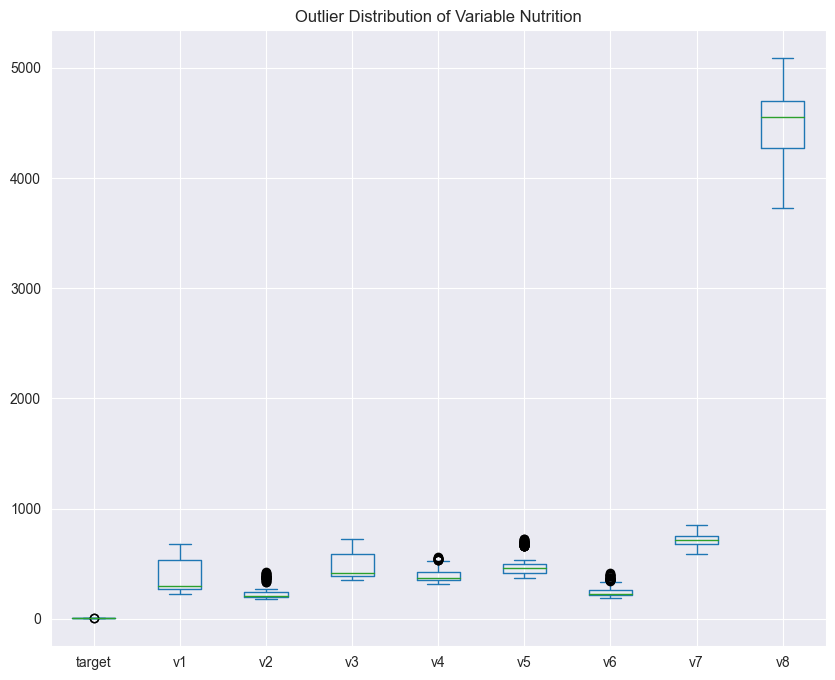

In [10]:
df.plot(kind='box', title='Outlier Distribution of Variable Nutrition', figsize=(10,8))
plt.show()

Tampilan boxplot menunjukkan terdapat outlier pada beberapa fiture seperti target(nutrisi), v2, v4, v5, dan v6. Outlier ini bisa dikibatkan oleh distribusi yang tidak normal. Penjelasan tersebut akan lebih jelas setelah memvisualisasikan distribusi data dari setiap fiture pada EDA.

## Exploratory Data Analysis (EDA)

Exploratory data analysis (EDA) atau analisis data eksploratif adalah proses yang digunakan untuk memahami dan menganalisis karakteristik dataset sebelum melakukan analisis yang lebih lanjut atau membangun model. EDA melibatkan eksplorasi data secara visual maupun numerik untuk mengidentifikasi pola, tren, anomali, dan hubungan antar variabel.

*1. Visualisasi Data Target*

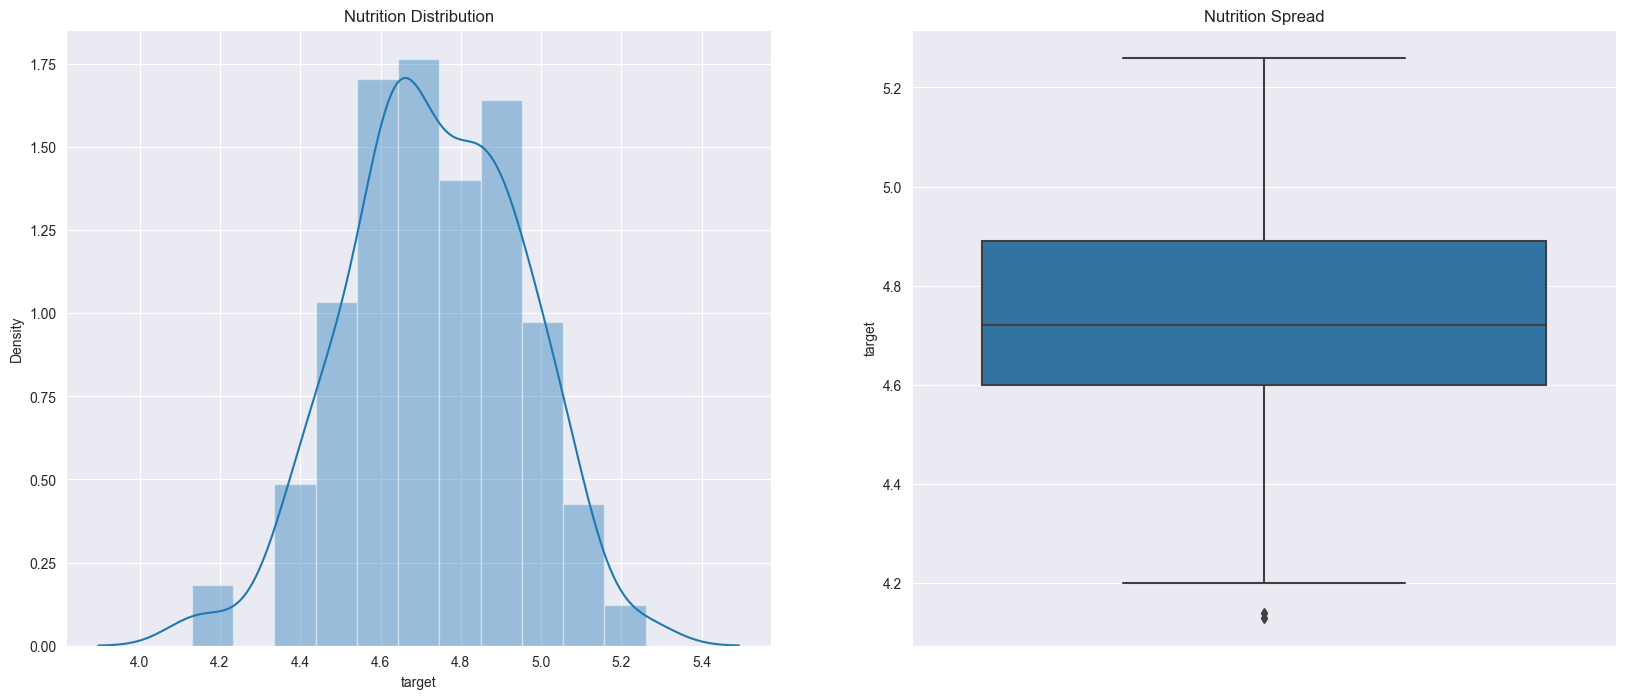

In [11]:
#Distribusi data Nutrisi
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Nutrition Distribution')
sns.distplot(df.target)

plt.subplot(1,2,2)
plt.title('Nutrition Spread')
sns.boxplot(y=df.target)

plt.show()

In [12]:
print(df.target.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))


count    160.00000
mean       4.73375
std        0.21405
min        4.13000
25%        4.60000
50%        4.72000
75%        4.89000
85%        4.96000
90%        5.01100
100%       5.26000
max        5.26000
Name: target, dtype: float64


Statement :
- Hasil Plot menunjukkan data terdistribusi normal.
- Tidak terdapat perbedaan yang signifikan antara median dan mean dari distribusi nutrisi.
- Sebaran data yang tidak jauh dari nilai mean mengindikasikan variasi yang rendah dalam distribusi nutrisi.
- Terdapat outlier pada data nutrisi. Nilai outlier ini tidak jauh dari batas bawah (quartil 1) dan data-data lainnya. Penyebab munculnya outlier ini diindikasikan akibat variabilitas alami, dimana data secara alamiah/wajar memiliki nilai yang lebih besar/kecil dari nilai lainnya. Dengan demikian, handling outlier tidak dilakukan pada data nutrisi(target).


*2. Visualisasi Data Kategorikal*

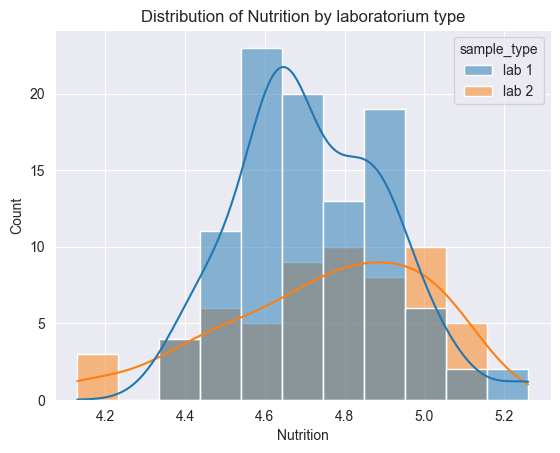

In [13]:
# Plot the distribution of total bill by the categorical feature
sns.histplot(data=df, x='target', hue='sample_type', kde=True)
plt.title(f'Distribution of Nutrition by laboratorium type')
plt.xlabel('Nutrition')
plt.ylabel('Count')

plt.show()

Statement :

- Kebanyakan data di analisis di laboratoium 1.
- Variasi nutrisi data di laboratorium 1 hampir sama dengan variasi data di laboratorium 2. Rentang nilai nutrisi pada lab.1 (4.4 s.d 5.2), sedangkan laboratorium 2 berada pada nilai (4.2 hingga 5.2)
- Variasi yang mirip atau hampir sama antara kedua kategori menunjukkan bahwa korelasi antara sample_type (tempat pengujian tanaman) tidaklah kuat dan tidak memberikan pengaruh terhadap prediksi nutrisi, sehingga fiture ini akan dihapus pada tahap preprocessing.

*3. Visualisasi Data Numerikal**

In [14]:
# melihat sebaran statistik secara umum
df.describe()

,target,v1,v2,v3,v4,v5,v6,v7,v8
count,160.00000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,4.73375,389.892437,237.442677,480.573041,394.109622,487.316520,251.450820,714.737926,4456.913233
std,0.21405,148.673511,70.128690,118.798984,63.060442,100.941711,59.634652,51.148098,335.035933
min,4.13000,227.285714,178.800000,348.933333,313.733333,373.333333,189.200000,586.266667,3725.666667
25%,4.60000,268.608333,194.029018,384.419643,353.181250,418.583333,213.000000,678.385417,4273.437500
50%,4.72000,295.162500,204.187500,414.383929,370.741667,456.031250,226.062500,718.833333,4554.766667
75%,4.89000,536.409375,244.716667,591.611404,424.131250,496.475000,262.531250,751.446875,4700.612500
max,5.26000,678.375000,422.812500,722.312500,558.500000,721.000000,415.375000,853.466667,5086.375000


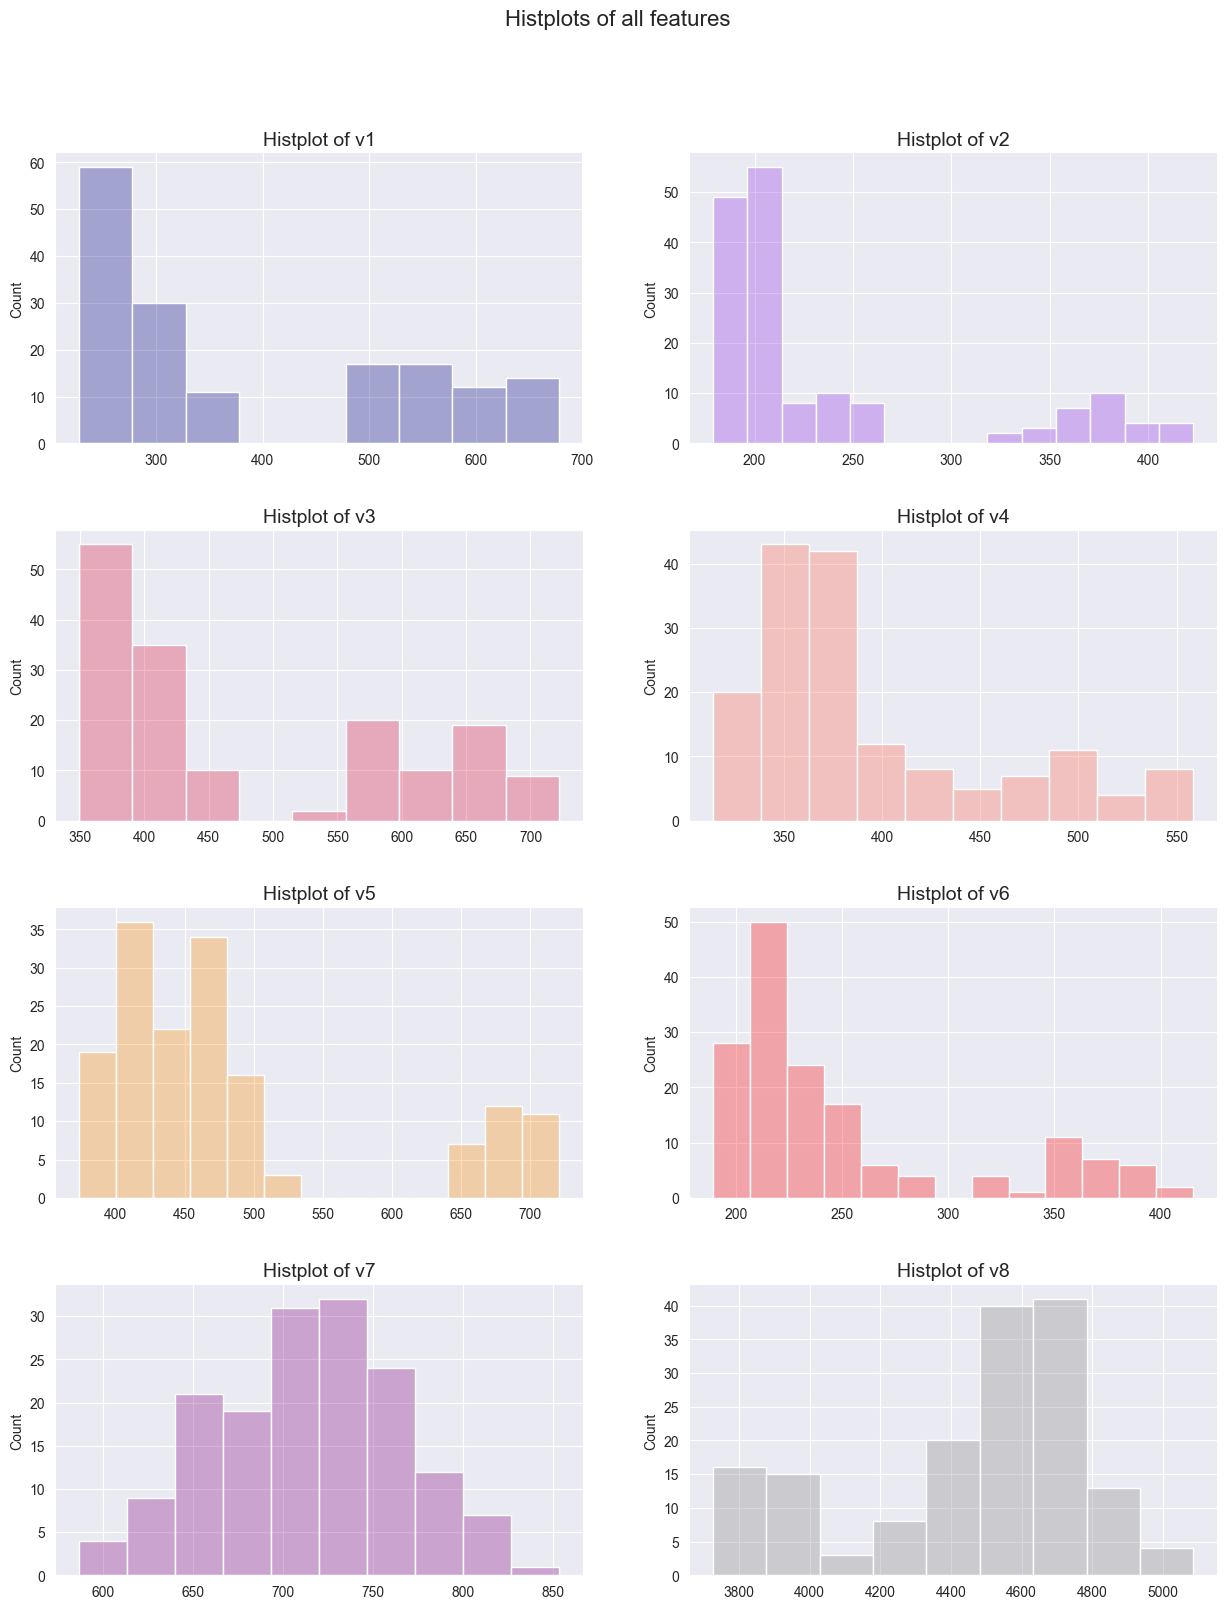

In [15]:
# ddistribusi fiture
fig, axs = plt.subplots(4, 2, figsize = (15, 18))
fig.subplots_adjust(hspace = 0.3, top = 0.9)
sns.despine()
colors = ['navy','blueviolet', 'crimson','tomato', 'darkorange', 'red', 'purple', 'gray']

for i in range(len(df.columns[1:-1])):
    sns.histplot(data=df, x=df.columns[1:-1][i], color=colors[i], alpha=0.3, 
                 ax=axs[i//2, i%2])
    axs[i//2, i%2].set_title('Histplot of ' + df.columns[1:-1][i], fontsize=14)
    axs[i//2, i%2].set_xlabel('')
    
plt.suptitle('Histplots of all features', fontsize=16);  

Statement :
- Fiture target dan v7 memili nilai mean yang hapir sama dengan nilai median, sehingga datanya terdistribusi normal. Hal ini terlihat jelas pada visualisasi distribusi kedua fiture tersebut.
- Nilai Mean > Median ditunjukkan pada fiture v1, v2, v3, v4, v5,v6 yang artinya data terdistribusi miring ke arah kanan (skewed positif) yang sesuai dengan visualisasi histogram.
- Fiture v8 memiliki Mean < Median yang mengindikasikan data terdistribusi miring ke arah kiri (skewed negatif)
- Beberapa data 'v2' jauh lebih besar dari median yang diindikasikan sebagai outlier. Penyebab adanya outlier dipicu oleh distribusi yang skewed.
- v4, v5 dan v6 meiliki data yang jauh lebih besar dari mean, data tersebut terdeteksi sebagai outlier dan dipicu oleh distribusi yang skewed.

*Apakah outlier" tersebut merupakan natural outlier?*

Untuk mengetahui suatu data berbeda secara alamiah, perlu untuk membandingkan data dengan keadaan yang sebenarnya. Contoh data extreme pada data financial adalah hal yang wajar karena variabilitas yang tinggi. In real life, kebanyakan outlier termasuk dalam natural outlier. Handle outlier dapat dilakukan dengan menghapus atau mengganti nilai dari data outlier/anomali tersebut. Data Aria memiliki banyak outlier, jika ingin menghapus, maka dapat kehilangan informasi. Namun jika ingin memanipulasi data , maka dapat menghasilkan kesimpulan yang salah atau menyesatkan akibat ketidaksesuaian data analisis dengan data lapangan. Oleh karena itu, diputuskan untuk tidak menghandle outlier.


*4. Korelasi Fiture dengan target**

Kenapa scatter plot, kenapa pearson heatmap?

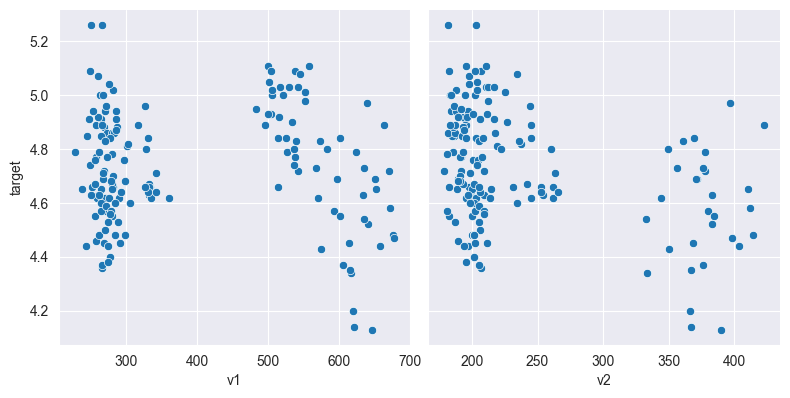

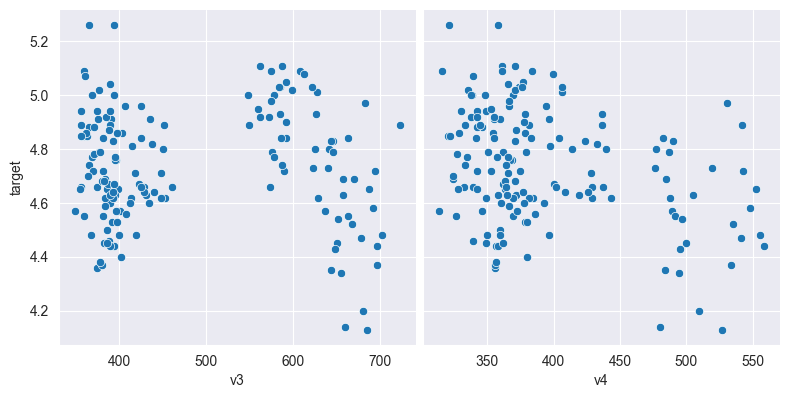

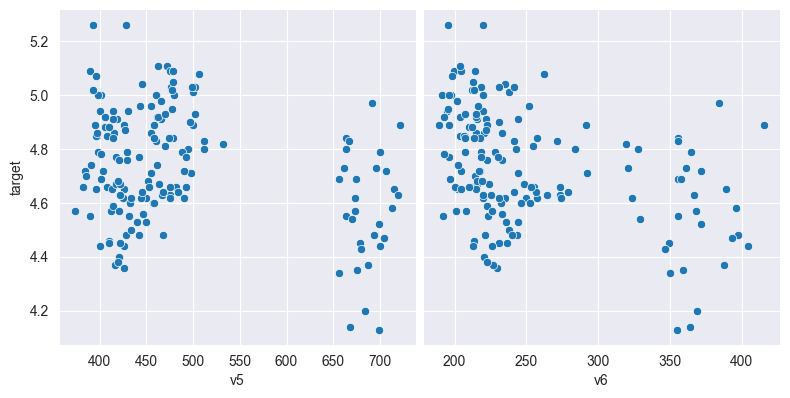

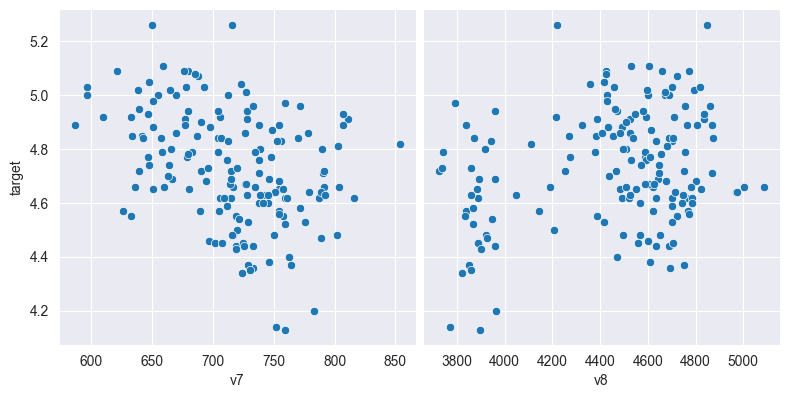

In [16]:
#Scatter Plot
def pp(x,y):
    sns.pairplot(df, x_vars=[x,y], y_vars='target',size=4, aspect=1, kind='scatter')
    plt.show()

pp('v1', 'v2')
pp('v3', 'v4')
pp('v5', 'v6')
pp('v7', 'v8')

Pearson correlation adalah metode statistik yang digunakan untuk mengukur hubungan antara dua variabel. Nilai korelasi Pearson dapat bervariasi dari -1 (hubungan linier negatif sempurna) hingga 1 (hubungan linier positif sempurna), dengan 0 menunjukkan tidak adanya hubungan linier antara dua variabel. Pearson correlation biasanya digunakan untuk memeriksa hubungan antara dua variabel kontinu.

Text(0.5, 1.0, 'Correlation matrix')

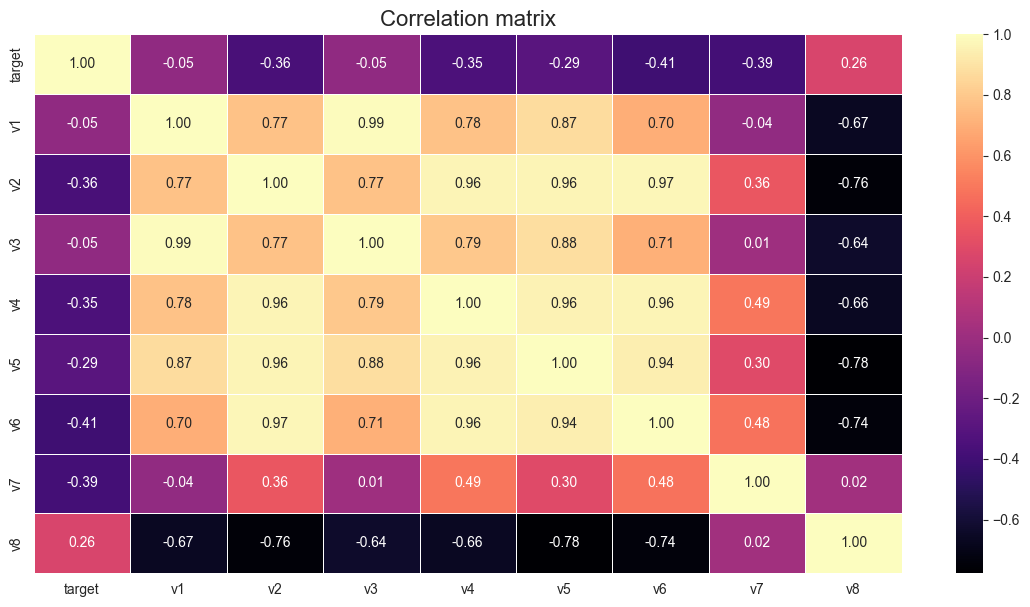

In [17]:
# Heatmap
fig, axs = plt.subplots(figsize = (14, 7))

sns.heatmap(df.corr(method='pearson'), annot=True, linewidth=0.5, 
            fmt=".2f", cmap='magma')
plt.title('Correlation matrix', fontsize=16)

Deskripsikan kenapa melakukan eda, apa saja hal yang akan dianalisis.
0. Bagaimana distribusi dari setiap fiture, distribusi balok, distribusi comparation, outlier
1. Variabel apa yang paling signifikan dalam memprediksi nutrisi tanaman? Variabel apa yang paling berpengaruh dalam memprediksi nutrisi tanaman? Dpat dilihat berdasarkan korelasi, heatmap, atau scatter plot.
2. Seberapa baik variabel tersebut mendeksripsikan prediksi nutrisi tanaman?

## Data Preprocessing

Pada tahap processing, data akan dibagi menjadi 3 yaitu data train, data test dan data inference. Data training merupakan data yang digunakan untuk melatih model. Data test digunakan untuk menguji performa model. Data inference digunakan untuk mengetahui sejauh mana model yang sudah dilatih mampu melakukan generalisasi terhadap data baru. Kemudian menggunakan paket Pipline untuk normalisasi data dan pemodelan.

*Step 1: Get Data Inference*

In [18]:
# Get Data for Model Inference
df_inf = df.sample(5, random_state =17)
df_inf

,target,v1,v2,v3,v4,v5,v6,v7,v8,sample_type
128,5.08,545.7500,234.562500,612.6875,399.2500,506.6875,262.000000,685.125000,4423.8125,lab 2
75,4.63,250.1875,197.000000,389.3750,358.0000,421.5625,219.750000,728.250000,4747.3125,lab 1
66,4.48,298.4375,201.562500,419.0625,396.7500,467.8750,239.750000,801.562500,4495.4375,lab 1
16,5.00,266.7500,183.062500,368.6875,338.4375,397.6875,191.312500,669.250000,4687.2500,lab 1
153,4.13,646.4000,389.666667,684.6000,527.0000,699.4000,354.933333,759.133333,3895.4000,lab 2


In [19]:
# Remove data inference
df_train_test = df.drop(df_inf.index)

# Reset Index untuk menghindari adanya error pada dataset
df_train_test.reset_index(drop= True, inplace = True)
df_inf.reset_index(drop = True, inplace= True)

*Step 2: Split Data Feature(X) dan Target(y)

In [20]:
# Splitting between x and y
X = df_train_test.drop('target', axis = 1)
y = df_train_test['target']

In [22]:
# Splitting between Train-set and Test-set
# Set 0.1 for 10% test-set and 80% train-set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=4,stratify=X['sample_type'])
print('Train Size : ', X_train.shape)
print('Test Size : ', X_test.shape)

Train Size :  (139, 9)
Test Size :  (16, 9)


*Step 3: Fiture Selection*

Berdasarkan hasil analisis  pada eksplorasi data, sample_type tidak menunjukkan adanya korelasi yang signifikan, sehingga data tersebut akan di remove. 

In [23]:
#Remove 'sample_type'
#Train set
X_train.drop(['sample_type'], inplace=True, axis=1)
X_train.reset_index(drop= True, inplace = True)
#Test Set
X_test.drop(['sample_type'], inplace=True, axis=1)
X_test.reset_index(drop= True, inplace = True)

*Step 4: Preprocessing Pipline (Scalling, Modeling)

Model ini dapat menangani hubungan yang non-linier antara variabel input dan output, dan memiliki banyak parameter yang dapat disesuaikan untuk meningkatkan performa prediksi.

Data cenderung memprioritaskan data dengan skala besar, sehingga kita perlu normalisasi agar tidak ada data yang dimayoritaskan ataupun diminoritaskan. Pada kasus ini, normalisasi dilakukan dengan scaling data karena semua data yang digunakan dalam pelatihan merupakan data numerikal. Metode yang digunakan adalah minmax scaler dan standard scaler. Minmax scaler digunakan untuk processing data yang terdistribusi miring (skew), sedangkan standard scaler digunakan untuk data yang terdistribusi normal.

In [50]:
#Buat list kolom data numerik dan kategorik
num_cols_mmx = ['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v8']
num_cols_std = ['v7']

In [ ]:
#Definisikan scaler dan encoder
num_minmax_pipeline = make_pipeline(SimpleImputer(strategy = 'median'),
                            MinMaxScaler())
num_std_pipeline = make_pipeline(SimpleImputer(strategy = 'median'),
                            StandardScaler())
cat_pipeline = make_pipeline(OrdinalEncoder())

final_pipeline = ColumnTransformer([
    ('pipe_num_minmax', num_minmax_pipeline, num_cols_mmx),
    ('pipe_num_std', num_std_pipeline, num_cols_std),
    ('pipe_cat', cat_pipeline, cat_columns)
])

In [57]:
# Defining data processing steps
standard_transformer = Pipeline(steps=[('standard', StandardScaler())])
minmax_transformer = Pipeline(steps=[('minmax', MinMaxScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('minmax', minmax_transformer, ['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v8']),
        ('standard', standard_transformer, ['v7'])
    ])

In [58]:
#Scalling dataset
X_train_scal = preprocessor.fit_transform(X_train)
X_test_scal = preprocessor.transform(X_test)

In [59]:
#Buat dataframe hasil normalisasi
X_train_df = pd.DataFrame(X_train_scal, columns= ['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v8'] + ['v7'])
#Buat dataframe hasil normalisasi
X_test_df = pd.DataFrame(X_test_scal, columns= ['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v8'] + ['v7'])

In [60]:
X_train_df

,v1,v2,v3,v4,v5,v6,v8,v7
0,0.614227,0.125245,0.743773,0.502733,0.370292,0.113439,0.816417,1.851732
1,0.108270,0.068493,0.108647,0.212005,0.205597,0.203880,0.465765,0.211010
2,0.905913,0.808064,0.780618,0.839711,0.926750,0.759884,0.009407,0.140603
3,0.022865,0.030602,0.100345,0.117118,0.115436,0.059541,0.557455,-0.624332
4,0.172836,0.220212,0.228164,0.323590,0.244966,0.279319,0.777368,0.567127
...,...,...,...,...,...,...,...,...
134,0.073770,0.049367,0.095926,0.098376,0.091982,0.113795,0.635851,-0.129197
135,0.110071,0.091755,0.085882,0.112420,0.118049,0.125953,0.597315,-0.158567
136,0.118781,0.067821,0.068920,0.104317,0.099329,0.102281,0.660195,0.077946
137,0.047990,0.094839,0.043566,0.078442,0.050623,0.057478,0.676510,-0.945449


## Modeling

Target data yang akan dilatih bertipe numerik dan memiliki hubungan non-linear dengan variabel input. Model pertama yang digunakan adalah SVR(Support Vector Regressor), model ini dapat menangani hubungan yang non-linier antara variabel input dan output. SVR dapat memproses data yang non-linear dengan mengubah data tersebut ke dalam ruang dimensi yang lebih tinggi (disebut sebagai "kernel trick") sehingga data yang awalnya tidak terlihat linearly separable menjadi linearly separable. Model ini juga cocok untuk data yang memiliki outlier. SVR menggunakan fungsi kerugian yang disebut dengan "epsilon-insensitive loss function" untuk mencegah pengaruh outlier terhadap model.

In [63]:
#Definisikan Model
svr = SVR()
# Training Model
svr.fit(X_train_df, y_train)

SVR()

In [65]:
# predict on the data
pred_train_svr = svr.predict(X_train_df)
pred_test_svr = svr.predict(X_test_df)
# calculate r2 score
print("R2 score of Train Set (SVR): ", r2_score(y_train, pred_train_svr))
print("R2 score of Test Set (SVR): ", r2_score(y_test, pred_test_svr))

R2 score of Train Set (SVR):  0.3827569042169554
R2 score of Test Set (SVR):  0.3030064279015101


Hasil Evaluasi model default Support vector machine menunjukkan bahwa model mengalami underfitting. Hal ini dikarenakan nilai r2 score data train dan data test tergolong rendah. Hal ini dapat dipicu oleh keurangan fitur yang diberikan pada model. Untuk meningkatkan performa model, diatur parameter seperti kernel, cost, gamma dan epsilon, kemudian melakukan tuning parameter untuk mengevaluasi kembali setiap parameter yang digunakan untuk model.

Ada beberapa cara yang dapat dilakukan untuk meningkatkan kinerja model regresi linear:

Menambahkan fitur: Menambahkan fitur baru yang relevan dapat membantu model dalam mempelajari pola lebih baik. Namun, perlu diperhatikan bahwa penambahan fitur yang tidak relevan justru dapat menurunkan kinerja model.

Mengurangi fitur: Sebaliknya, jika terdapat banyak fitur yang tidak relevan atau memiliki korelasi tinggi satu sama lain, maka dapat dilakukan penghapusan fitur untuk meningkatkan efisiensi dan keakuratan model.

Melakukan transformasi data: Beberapa teknik transformasi data seperti normalisasi, standarisasi, atau transformasi logaritmik dapat membantu menangani masalah heteroskedastisitas, dan meningkatkan kinerja model.

Menggunakan model yang lebih kompleks: Jika model regresi linear sederhana tidak cukup, maka dapat digunakan model yang lebih kompleks seperti regresi polynomial, regresi ridge, regresi lasso, atau regresi elastik net.

Menggunakan metode ensemble: Metode ensemble seperti random forest atau gradient boosting dapat membantu meningkatkan kinerja model dengan mengkombinasikan beberapa model.

Menambahkan regularisasi: Regularisasi dapat membantu meminimalkan overfitting dan meningkatkan generalisasi model. Beberapa contoh teknik regularisasi yang dapat digunakan adalah ridge regression dan lasso regression.

Melakukan tuning parameter: Mengevaluasi kembali setiap parameter yang digunakan untuk model, dapat membantu mengoptimalkan kinerja model. Beberapa teknik tuning parameter yang dapat digunakan adalah GridSearchCV atau RandomizedSearchCV.

Dalam melakukan improvement pada model regresi, disarankan untuk melakukan evaluasi terhadap hasil dan kinerja model secara berkala dengan menggunakan teknik validasi silang atau menggunakan data validasi yang terpisah.

In [72]:
# Set the parameters
params_svr = {
    'kernel': [ 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'epsilon': [0.1, 0.01, 0.001]
}

svr_imp = GridSearchCV(SVR(), 
                       param_grid = params_svr, cv=5, scoring='r2')
svr_imp.fit(X_train_df, y_train)
print(svr_imp.best_estimator_)

SVR(C=1, epsilon=0.001, gamma='auto')


In [73]:
# predict on the data
pred_train_svr1 = svr_imp.predict(X_train_df)
pred_test_svr1 = svr_imp.predict(X_test_df)
# calculate r2 score
print("R2 score of Train Set (SVR) After Improvement: ", r2_score(y_train, pred_train_svr1))
print("R2 score of Test Set (SVR) After Improvement: ", r2_score(y_test, pred_test_svr1))

R2 score of Train Set (SVR) After Improvement:  0.3100288551534276
R2 score of Test Set (SVR) After Improvement:  0.18731322164886544


Setelah mengeset parameter, hasil evaluasi semakin memburuk. Performa model pada data test semakin kecil sehingga gap r2 score antara data train dan data test semakin besar. Solusi untuk meningkatkan performa model dengan menggunakan metode ensemble seperti random forest atau gradient boosting. Metode ensamble mengkombinasikan beberapa model untuk meningkatkan performa model. 

**Model Random Forest**

*Model Default*

In [76]:
#Definisikan Model
forest = RandomForestRegressor()
# Training Model
forest.fit(X_train_df, y_train)

RandomForestRegressor()

In [77]:
# predict on the data
pred_train_forest = forest.predict(X_train_df)
pred_test_forest = forest.predict(X_test_df)
# calculate r2 score
print("R2 score of Train Set (Forest) Before Improvement: ", r2_score(y_train, pred_train_forest))
print("R2 score of Test Set (Forest) Before Improvement: ", r2_score(y_test, pred_test_forest))

R2 score of Train Set (Forest) Before Improvement:  0.8773851342867455
R2 score of Test Set (Forest) Before Improvement:  0.44333093539140067


Hasil evaluasi model default random forest mengindikasikan model mengalami overfit. Metode ini baik dalam mengevaluasi data train(R2 score:0.877) namun tidak pada data test(R2 Score :0.4433), yang mengindikasikan model tidak mampu mengeneralisasi data baru dengan baik. Selanjutnya, untuk meningkatkan performa model, atur parameter model dan evaluasi kinerja model menggunakan hyperparameter tuning dan cross validation.

*Model Improvement*

In [81]:
#Model Improvement
params_forest = {'n_estimators': [10, 20, 50, 100], 
                  'max_depth': [3, 5, 7, 10], 
                  'min_samples_split': [3, 5, 7], 
                  'min_samples_leaf': [5, 10, 15]}

forest_imp = GridSearchCV(forest, 
                       param_grid=params_forest, cv=5, scoring='r2')
forest_imp.fit(X_train_df, y_train)
print(forest_imp.best_estimator_)

RandomForestRegressor(max_depth=10, min_samples_leaf=15, min_samples_split=5,
                      n_estimators=10)


In [82]:
# predict on the data
pred_train_forest1 = forest_imp.predict(X_train_df)
pred_test_forest1 = forest_imp.predict(X_test_df)
# calculate r2 score
print("R2 score of Train Set (Forest) After Improvement: ", r2_score(y_train, pred_train_forest1))
print("R2 score of Test Set (Forest) After Improvement: ", r2_score(y_test, pred_test_forest1))

R2 score of Train Set (Forest) After Improvement:  0.35152682835032123
R2 score of Test Set (Forest) After Improvement:  0.3119627566598323


Setelah mencoba meningkatkan performa model, model ini berhasil menangani masalah overfit. Namun, performa model dalam memprediksi data train semakin menurun meanjadi 0.3515. Selanjutnya, melakukan modeling menggunakan metode ensemble lainnya.

**XGBoost**

*Model Default*

In [79]:
#Definisikan Model
xgb = XGBRegressor()
# Training Model
xgb.fit(X_train_df, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [80]:
# predict on the data
pred_train_xgb = xgb.predict(X_train_df)
pred_test_xgb = xgb.predict(X_test_df)
# calculate r2 score
print("R2 score of Train Set (XGBoost) Before Improvement: ", r2_score(y_train, pred_train_xgb))
print("R2 score of Test Set (XGBoost) Before Improvement: ", r2_score(y_test, pred_test_xgb))

R2 score of Train Set (XGBoost) Before Improvement:  0.9999792783864272
R2 score of Test Set (XGBoost) Before Improvement:  0.07143096873446075


Model XGBoost default menunjukkan performa yang sangat baik untuk prediksi data train yakni 0.9999, nilai ini mendekati nilai sempurna yaitu 1. Namun, model ini sangat buruk dalam mengeneralisasi data baru dengan performa r2score:0.0714. Untuk itu, dilakukan improvement terhadap model dengan set parameter, hyperparameter tuning dan cross validation.

*XGBoost Improvement*

In [84]:
#Set Parameter
param_xgb = {
    'learning_rate': [0.05, 0.1, 0.15],
    'max_depth': [3, 4, 5],
    'n_estimators': [100, 200, 300],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'gamma': [0, 1, 2],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 1, 5],
}

# Define GridSearchCV object for parameter tuning
xgb_imp = GridSearchCV(xgb, param_grid=param_xgb, cv=5, n_jobs=-1, scoring='r2')

# Training Model
xgb_imp.fit(X_train_df, y_train)
print(xgb_imp.best_estimator_)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=3, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=200, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)


In [85]:
# predict on the data
pred_train_xgb1 = xgb_imp.predict(X_train_df)
pred_test_xgb1 = xgb_imp.predict(X_test_df)
# calculate r2 score
print("R2 score of Train Set (XGBoost) After Improvement: ", r2_score(y_train, pred_train_xgb1))
print("R2 score of Test Set (XGBoost) After Improvement: ", r2_score(y_test, pred_test_xgb1))

R2 score of Train Set (XGBoost) After Improvement:  0.6715836754728813
R2 score of Test Set (XGBoost) After Improvement:  0.393902184278601


Setelah melakukan improvement, performa model dalam memprediksi data train menurun menjadi 0.6715 dari 0.99999. Namun, hasil evaluasi pada test menunjukkan hasil yang jauh lebih baik, artinya model mampu mengeneralisasi data baru.

Dari hasil evaluasi model yang diberikan, model yang lebih baik adalah Random Forest setelah improvement. R2 score untuk train set sebelum improvement terlalu tinggi dan menunjukkan overfitting, tetapi setelah improvement, R2 score untuk train set menurun dan model menjadi lebih umum dan bisa digeneralisasikan ke data test. Selain itu, R2 score untuk test set pada Random Forest sebelum dan setelah improvement juga lebih baik dibandingkan model yang lain. Namun, meskipun model XGBoost memiliki R2 score yang lebih rendah dibandingkan model Random Forest setelah improvement, perlu diingat bahwa XGBoost dapat bekerja lebih baik pada dataset yang lebih besar, jadi hasil ini mungkin tergantung pada ukuran dataset yang digunakan.

## Model Inference

In [86]:
from joblib import dump

In [106]:
# get the best estimator
best_xgb = xgb_imp.best_estimator_

# save the best estimator using joblib
dump(best_xgb, 'best_xgb.joblib')
#Save Pipline
with open('preprocessor.pkl', 'wb') as file_1:
  joblib.dump(preprocessor, file_1)  

In [107]:
#Load all files
# Load the best estimator
best_xgb = joblib.load('best_xgb.joblib')
#Load preprocessor
with open('preprocessor.pkl', 'rb') as file_1:
  preprocessor = joblib.load(file_1)

In [89]:
#Display inference set
df_inf

,target,v1,v2,v3,v4,v5,v6,v7,v8,sample_type
0,5.08,545.7500,234.562500,612.6875,399.2500,506.6875,262.000000,685.125000,4423.8125,lab 2
1,4.63,250.1875,197.000000,389.3750,358.0000,421.5625,219.750000,728.250000,4747.3125,lab 1
2,4.48,298.4375,201.562500,419.0625,396.7500,467.8750,239.750000,801.562500,4495.4375,lab 1
3,5.00,266.7500,183.062500,368.6875,338.4375,397.6875,191.312500,669.250000,4687.2500,lab 1
4,4.13,646.4000,389.666667,684.6000,527.0000,699.4000,354.933333,759.133333,3895.4000,lab 2


In [90]:
#Remove sample_type
df_inf.drop(['sample_type'], inplace=True, axis=1)
df_inf.reset_index(drop= True, inplace = True)

In [91]:
# Splitting between 'X' and 'y'
X_inf = df_inf.drop(['target'], axis = 1)
y_inf = df_inf['target']

In [93]:
#Scalling dataset
X_inf_scal = preprocessor.transform(X_inf)
#Buat dataframe hasil normalisasi
X_inf_df = pd.DataFrame(X_inf_scal, columns= ['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v8'] + ['v7'])
X_inf_df

,v1,v2,v3,v4,v5,v6,v8,v7
0,0.705989,0.221504,0.706398,0.349380,0.383569,0.321875,0.513075,-0.531816
1,0.050770,0.066167,0.108313,0.180853,0.138722,0.135072,0.750819,0.312583
2,0.157733,0.085035,0.187823,0.339167,0.271932,0.223500,0.565713,1.748061
3,0.087487,0.008529,0.052906,0.100929,0.070050,0.009340,0.706679,-0.842652
4,0.929116,0.862928,0.898997,0.871306,0.937872,0.732766,0.124739,0.917287


In [108]:
# Make predictions using the best estimator
pred_inf = best_xgb.predict(X_inf_df)
print("R2 score of Inference Set: ", r2_score(y_inf, pred_inf))

R2 score of Inference Set:  0.36770398812536764


In [109]:
#Buat data frame untuk data inference
#Buat dataframe
y_pred = pd.DataFrame(pred_inf, columns=['nutrition_pred'])
# concate inference set dan price_prediction
data_inf_predict= pd.concat([y_inf, y_pred], axis =1)
data_inf_predict[["target", "nutrition_pred"]]
# Rename column target
data_inf_predict.rename(columns = {"target": "nutrition"}, inplace=True)
data_inf_predict

,nutrition,nutrition_pred
0,5.08,4.849286
1,4.63,4.707780
2,4.48,4.715634
3,5.00,4.834235
4,4.13,4.620884


## Kesimpulan

Berdasarkan hasil analisis didapatkan bahwa :
1. Jumlah data yang di uji di laboratorium 1 lebih banyak dibanding laboratorium 2. Variasi data nutrisi di laboratorium 1 dan laboratorium 2 hampir sama yang mengindikasikan bahwwa tidak ada hubungan yang kuat antara tempat pengujian tanaman dan informasi nutrisi tanaman. 
2. Kebanyakan data memiliki distribusi yang miring yang menyebabkan munculnya outlier.
3. Hasil scatter plot menunjukkan mayoritas data memiliki pola yang jelas, sehingga diindikasikan bahwa tidak ada variabel yang memiliki relasi yang kuat dengan target. Hal ini diperkuat dengan hasil perhitungan korelasi menggunakan metode pearson. Semua variabel memiliki nilai korelasi dibawah 0.5, sedangkan korelasi yang kuat apabila nilainya mendekati 1.
4. Berdasarkan hasil evaluasi dari 6 model, tidak ada model yang menunjukkan performa yang baik. Hal ini bisa dipicu oleh minimnya jumlah data yang menyebabkan minimnya informasi, sehingga model tidak optimal dalam melakukan pembelajaran. Namun dari semua model, model xgboost improvemeent dipilih sebagai model terbaik. Model ini dikategorikan sebagai model overfit dikarenakan perbedaan gap r2 score yang besar antara train set dan test set. Namun, perbedaan gap r2 score tiak sebesar gap dari model overfit lainnya seperti Forest Default dan XGBoost Default dan model menjadi lebih umum dan bisa digeneralisasikan ke data test.



Jika diberi waktu/dana tambahan dari project analisis nutrisi tanaman, maka hal yang dapat dilakukan adalah membuka cabang wilayah baru untuk produksi tanaman. Dengan mengetahui informasi nutrisi dari setiap nutrisi tanaman maka kita dapat menentukan beberapa hal berikut:

1. Tentukan pupuk yang tepat: Pilih pupuk yang tepat untuk jenis tanaman yang diproduksi dan jenis tanah yang digunakan.

2. Perencanaan penanaman: Tentukan waktu penanaman yang tepat, penggunaan bibit yang tepat dan jarak tanam yang ideal.

3. Pengendalian hama dan penyakit: Lakukan pengendalian hama dan penyakit dengan mengikuti praktik pertanian yang baik.

Monitor kondisi tanaman secara teratur: Monitor pertumbuhan tanaman secara teratur untuk mengetahui apakah ada masalah yang mempengaruhi produksi.

4. Kelola secara finansial: Rencanakan pengelolaan keuangan dengan baik, termasuk dalam pengadaan pupuk, bibit, dan bahan-bahan lainnya yang dibutuhkan.

